<a href="https://colab.research.google.com/github/prakharsingh1312/Skin-Cancer-Detection/blob/master/cancer_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip -x "/content/drive/My Drive/679322_1193409_bundle_archive.zip"


Streaming output truncated to the last 5000 lines.
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065372.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065374.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_2019

In [3]:
import pandas as pd
df=pd.read_csv('/content/ISIC_2019_Training_GroundTruth.csv')

In [4]:
lister=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

In [5]:
import numpy as np
df['target']=np.nan
for count,rows in enumerate(df['image']):
    for col in lister:
        if df[col][count]==1:
            df['target'][count]=col
            break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df['target'].value_counts()

NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: target, dtype: int64

In [7]:
df1=pd.read_csv('/content/ISIC_2019_Training_Metadata.csv')

In [8]:
df1

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [9]:
df2=pd.merge(df,df1,on='image')

In [10]:
for l in lister:
    df2.drop(l,1,inplace=True)

In [11]:
for count,rows in enumerate(df2['image']):
    df2['image'][count]="{}.jpg".format(df2['image'][count])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df2

,image,target,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000.jpg,NV,55.0,anterior torso,NaN,female
1,ISIC_0000001.jpg,NV,30.0,anterior torso,NaN,female
2,ISIC_0000002.jpg,MEL,60.0,upper extremity,NaN,female
3,ISIC_0000003.jpg,NV,30.0,upper extremity,NaN,male
4,ISIC_0000004.jpg,MEL,80.0,posterior torso,NaN,male
...,...,...,...,...,...,...
25326,ISIC_0073247.jpg,BCC,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248.jpg,BKL,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249.jpg,MEL,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251.jpg,NV,55.0,palms/soles,BCN_0002083,female


In [13]:
df2.to_csv('trainer.csv',index=False)

In [14]:
from fastai.imports import *
from fastai import *
from fastai.vision import *
from torchvision.models import *

In [16]:
path='/content/ISIC_2019_Training_Input'
tfms = get_transforms(do_flip = True, max_lighting = 0.2, max_zoom= 1.1, max_warp = 0.15, max_rotate = 45)
data = ImageDataBunch.from_csv(path, folder= 'ISIC_2019_Training_Input', 
                              valid_pct = 0.0,
                              csv_labels = 'trainer.csv',
                              ds_tfms = tfms, 
                              fn_col = 'image',
                              #test = 'train_SOaYf6m/images', 
                              label_col = 'target',
                              bs = 8,
                              size = 224).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
fbeta = FBeta(average='weighted', beta = 1)
learn = cnn_learner(data, models.densenet121, metrics=[accuracy, fbeta])
learn.fit_one_cycle(5, max_lr =[8e-6, 8e-4, 8e-3] )#slice(8e-6, 8e-3)
  #Finding learning rate based on the training
learn.lr_find()
learn.recorder.plot(suggestion=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


epoch,train_loss,valid_loss,accuracy,f_beta,time


Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please s

Min numerical gradient: 2.51E-05
Min loss divided by 10: 6.31E-08


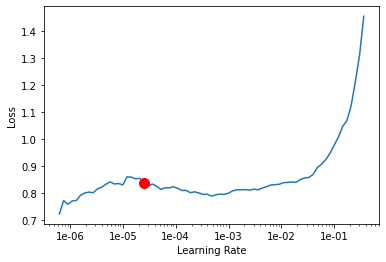

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
img=open_image('/content/Melanoma.jpg')
tens=learn.predict(img)[-1].numpy()
'''tens1=learn.predict(img)[-1].numpy()
print('Predicted',dataset[np.argmax(tens1)],'with probability ',np.max(tens1))'''
print(np.argmax(tens))

5


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [ ]:
tens

array([3.719619e-03, 1.239911e-04, 1.348223e-01, 1.433004e-04, 3.640825e-01, 4.966462e-01, 3.179871e-04, 1.440635e-04],
      dtype=float32)